In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
#Load dataset
df = pd.read_csv(r"C:\Users\ARUN\Downloads\UpdatedResumeDataSet.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
#Explore categories
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

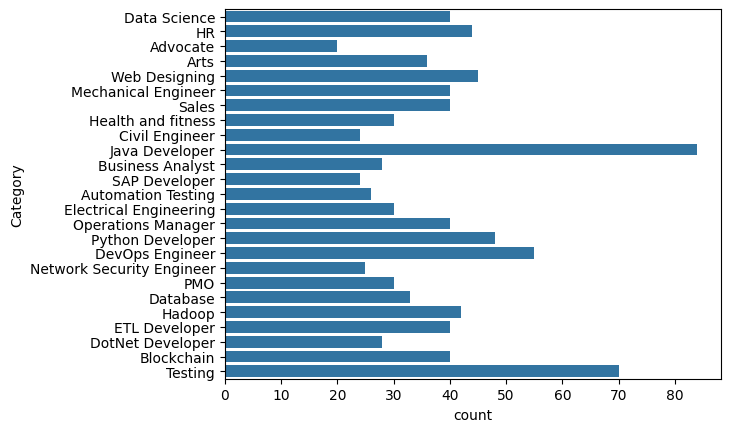

In [6]:

sns.countplot(df['Category'])

([<matplotlib.patches.Wedge at 0x2394e3e9d00>,
 [Text(1.058871227218848, 0.29797940225467084, 'Data Science'),
  Text(0.7841417277955074, 0.7714413462667635, 'HR'),
  Text(0.41347312332933783, 1.0193331036929403, 'Advocate'),
  Text(0.053862303159734344, 1.0986805051052508, 'Arts'),
  Text(-0.27717597647551645, 1.0645062132579801, 'Web Designing'),
  Text(-0.5706079221763859, 0.9404289442321242, 'Mechanical Engineer'),
  Text(-0.8089120194310812, 0.7454269547178518, 'Sales'),
  Text(-0.9773197556910534, 0.5048228353947349, 'Health and fitness'),
  Text(-1.0745481947062527, 0.23525768266633296, 'Civil Engineer'),
  Text(-1.0988505276751686, -0.05027442518820011, 'Java Developer'),
  Text(-1.0485773817141402, -0.3323935537243749, 'Business Analyst'),
  Text(-0.9271404255154017, -0.5919549234317762, 'SAP Developer'),
  Text(-0.7427816407083776, -0.8113417493427605, 'Automation Testing'),
  Text(-0.5207133706140742, -0.9689466371600295, 'Electrical Engineering'),
  Text(-0.2910572162881381

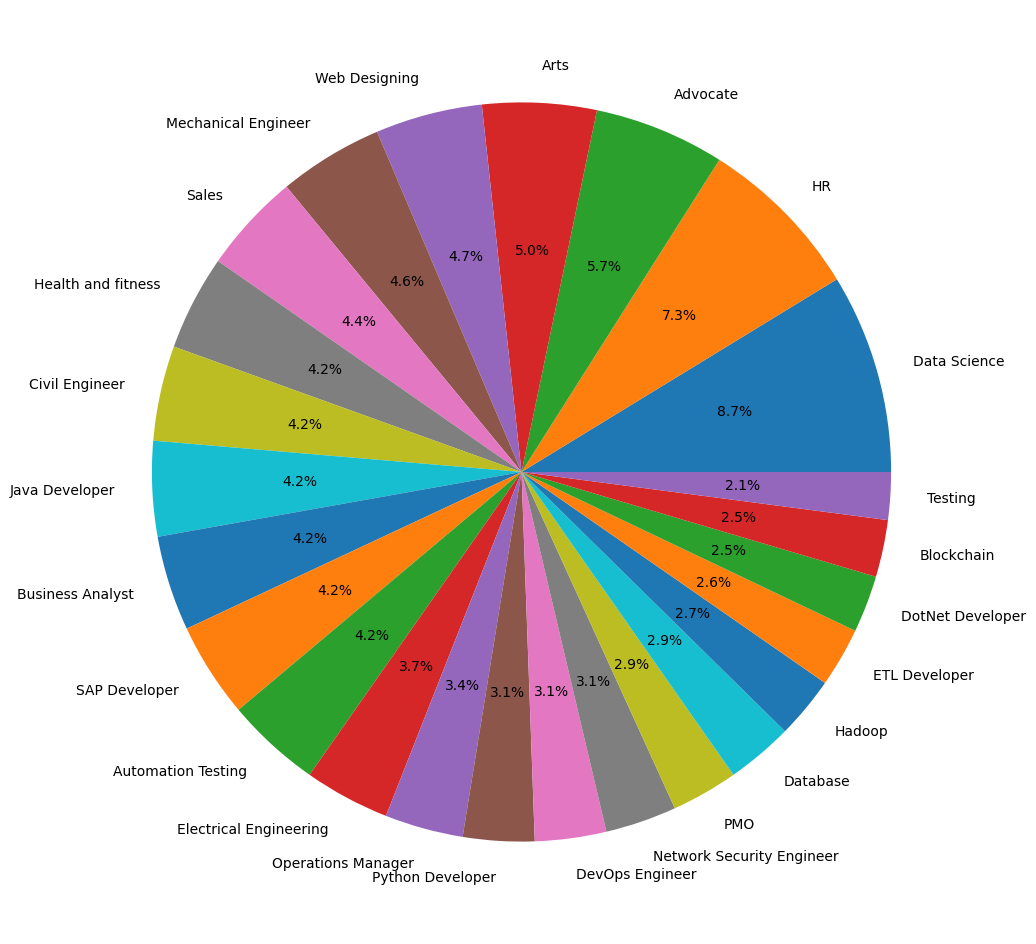

In [7]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize = (17,12))
plt.pie(counts,labels=labels,autopct="%1.1f%%")

In [8]:
#Exploring resume
df['Category'][0]


'Data Science'

In [9]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [10]:
#Balance classes(categories)
print("Original Category Distribution: ")
print(df['Category'].value_counts())
#Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df['Category'].value_counts().max()
#Perform oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)
# Shuffle the dataset to avoid any order bias
df = balanced_df.sample(frac=1).reset_index(drop=True)
# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())

Original Category Distribution: 
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
Data Science                 84
Health and fitness           84
Sales

C:\Users\ARUN\AppData\Local\Temp\ipykernel_12632\639850738.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


In [11]:
#cleaning data urls,hashtags,mentions,special letters,punctuations
import re
def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s',' ',txt)
    cleanText = re.sub(r'@\S+',' ',cleanText)
    cleanText = re.sub(r'RT|cc',' ',cleanText)
    cleanText = re.sub(r'#\S+\s',' ',cleanText)
    cleanText = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]',' ',cleanText)
    cleanText = re.sub(r'\s+',' ',cleanText)
                       
    return cleanText

In [12]:
df['Resume'] = df['Resume'].apply(lambda x:cleanResume(x))

In [13]:
df['Resume']

0       Expertise Data and Quantitative Analysis Decis...
1       Personal Skills Good verbal and written commun...
2       Education Details May 2013 to May 2017 B E UIT...
3       Education Details Bachelor s Bachelor s Commer...
4       Skills ETL Data Warehousing SQL PL SQL Basic C...
                              ...                        
2095     Operating Systems Windows Others MS Excel MS ...
2096    Education Details February 2006 to February 20...
2097    Education Details January 2017 Rachana Sansad ...
2098    Education Details July 2016 to May 2019 BE Ele...
2099    Education Details June 2014 to June 2018 BE Me...
Name: Resume, Length: 2100, dtype: object

In [14]:
# words in to categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [15]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [16]:
df['Category'].unique()

array([ 6, 14, 22, 21,  1, 13,  7,  8, 11,  0, 15,  9, 20,  2, 23, 18, 12,
       16, 10, 17,  3, 19, 24,  5,  4])

In [17]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

In [18]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
RequiredText = tfidf.transform(df['Resume'])


In [19]:
RequiredText

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 365592 stored elements and shape (2100, 7314)>

In [20]:
#SPlitting
from sklearn.model_selection import train_test_split


In [21]:
x_train,x_test,y_train,y_test = train_test_split(RequiredText,df['Category'],test_size=0.2,random_state=42)


In [22]:
x_train.shape

(1680, 7314)

In [23]:
x_test.shape

(420, 7314)

In [24]:
#train and print classification report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
ypred = clf.predict(x_test)
print("\n KNN classifier Result: ")
print(f"Accuracy:{accuracy_score(y_test,ypred):.4f}")
print(f"Confusion matrix: \n{confusion_matrix(y_test,ypred)}")



 KNN classifier Result: 
Accuracy:0.9952
Confusion matrix: 
[[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0 

In [26]:
 #Save files
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl', 'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))

In [27]:
#Creating the predicting system
def predict(input_resume):
    cleaned_text = cleanResume(input_resume)
    vectorized_text = tfidf.transform([cleaned_text])
    vectorized_text = vectorized_text.toarray()
    predicted_category = clf.predict(vectorized_text)
    predicted_category_name = le.inverse_transform(predicted_category)
    return predicted_category_name[0]

In [29]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume
predict(myresume)

'Health and fitness'

In [30]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume
predict(myresume)

'Network Security Engineer'